# Костыра Екатерина Сергеевна ПМ1901

## Практика 28.02.2022

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
ausair = pd.read_csv('C:/Users/79811/anaconda3/ausair.csv', index_col=0)
ausair.head()

NameError: name 'pd' is not defined

In [69]:
passengers = pd.read_csv('C:/Users/79811/anaconda3//passengers.csv', index_col='date', parse_dates=True)

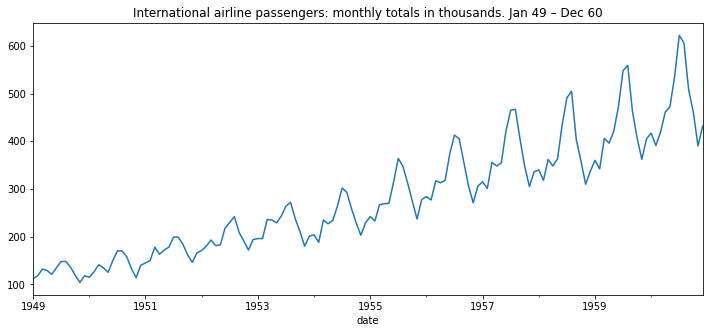

In [126]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()
vals = passengers['num_passengers'].values

### Модель Хольта-Уинтерса

Параметры: alpha (отвечает за уровень), beta (отвечает за тренд), gamma (отвечает за сезонность)

In [71]:
forecast = [vals[11]]
level = vals[11]
trend = np.mean(vals[12:24])-np.mean(vals[:12])
seasonality = (vals[12]-np.mean(vals[:12])).tolist

h = 36
m = 12

alpha = 0.4
beta = 0.03
gamma = 0.75

forecast = [vals[11]]
level = vals[11]
trend = np.mean(vals[12:24]) - np.mean(vals[:12])
seasonality = (vals[:12] - np.mean(vals[:12])).tolist()

h = 36
m = 12

alpha = 0.4
beta = 0.03
gamma = 0.75
phi = 1

for t in range(12, len(vals) + h):
    if t < len(vals):
        value = vals[t]
    else:
        value = forecast[-1]
        
    prev_level = level
    prev_trend = trend
    prev_season = seasonality[t - m]
    last_season = seasonality[t - m + 1]
    
    level = alpha * (value - prev_season) + (1 - alpha) * (level + phi * trend)
    
    trend = beta * (level - prev_level) + (1 - beta) * phi * trend
    
    season = gamma * (value - prev_level - prev_trend) + (1 - gamma) * prev_season
    
    seasonality.append(season)
    forecast.append(level + phi * trend + last_season)

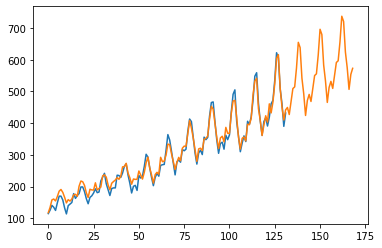

In [72]:
plt.plot(vals[12:])
plt.plot(forecast)

In [127]:
def holt_winters(series, h=0, m=12, alpha = 0.4, beta = 0.03, gamma = 0.75, phi = 1, mode='additive'):
    forecast = [vals[11]]
    level = vals[11]
    trend = np.mean(vals[12:24]) - np.mean(vals[:12])
    seasonality = (vals[:12] - np.mean(vals[:12])).tolist()
    
    if mode == 'additive':
        for t in range(12, len(vals) + h):
            if t < len(vals):
                value = vals[t]
            else:
                value = forecast[-1]
                
            prev_level = level
            prev_trend = trend
            prev_season = seasonality[t - m]
            last_season = seasonality[t - m + 1]
    
            level = alpha * (value - prev_season) + (1 - alpha) * (level + phi * trend)
    
            trend = beta * (level - prev_level) + (1 - beta) * phi * trend
    
            season = gamma * (value - prev_level - prev_trend) + (1 - gamma) * prev_season
    
            seasonality.append(season)
            forecast.append(level + phi * trend + last_season)
        
        return forecast
    elif mode == 'multiplicative':
        for t in range(12, len(vals) + h):
            if t < len(vals):
                value = vals[t]
            else:
                value = forecast[-1]
            prev_level = level
            prev_trend = trend
            prev_season = seasonality[t - m]
            last_season = seasonality[t - m + 1]
    
            level = alpha * (value - prev_season) + (1 - alpha) * (level + phi * trend)
    
            trend = beta * (level - prev_level) + (1 - beta) * phi * trend
    
            season = gamma * (value/(prev_level - prev_trend) + (1 - gamma) * prev_season)
    
            seasonality.append(season)
            forecast.append(level + phi * trend + last_season)
        
        return forecast

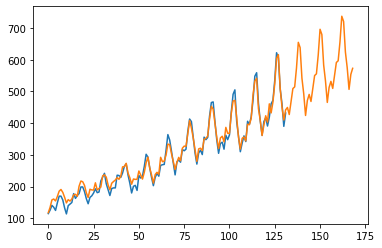

In [131]:
plt.plot(vals[12:])
plt.plot(holt_winters(vals, h=36, mode='additive'))

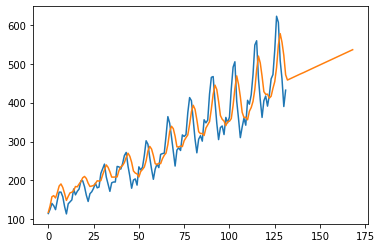

In [129]:
plt.plot(vals[12:])
plt.plot(holt_winters(vals, h=36, mode='multiplicative'))

In [78]:
def mean_squared_error(serias, m, alpha, beta, gamma, phi, mode = 'additive'):
    vals = serias.values
    forecast = holt_winters(series, 0, m, alpha, beta, gamma, phi, mode)
    sq = (forecast[:-1]-vals[m:])**2
    return sq.mean()

In [79]:
mean_squared_error(passengers['num_passengers'], 12, alpha = 0.4, beta = 0.03, gamma = 0.75, phi = 1, mode='additive')

254.34230320585812

In [81]:
from scipy.optimize import minimize

In [114]:
m = 12
phi = 1
mode='additive'
mse = lambda x: mean_squared_error(vals, m, x[0], x[1], x[2], phi, mode)
bnds = ((0,None) for i in range(3))

In [115]:
minimize(mse, (0, 0, 0), bounds = tuple(bnds))

      fun: 209.96676726879642
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.64845915e-04, -8.21387403e-04,  5.96855895e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 132
      nit: 25
     njev: 33
   status: 0
  success: True
        x: array([0.42792076, 0.08373108, 0.849219  ])

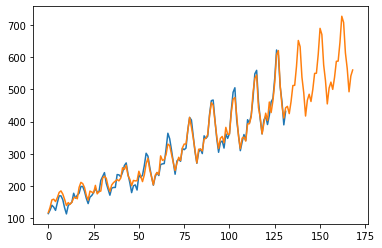

In [130]:
plt.plot(vals[12:])
plt.plot(holt_winters(vals, m = 12, h = 36, alpha = 0.42792076, beta = 0.08373108, gamma = 0.849219, phi = 1))